In [5]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 

import statsmodels.api as sm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

### Подготавливаем данные

In [6]:
data_train = pd.read_csv("~/math-ds/data_train.csv")
data_test = pd.read_csv("~/math-ds/data_test.csv")

In [7]:
foods = data_train[data_train['category'] == "foods"]
hobbies = data_train[data_train['category'] == "hobbies"]
household = data_train[data_train['category'] == "household"]

foods_date = foods.pivot_table(index=['date'], values=['sale'], aggfunc='sum')
foods_date

,sale
date,
2015-01-01,5123
2015-01-02,9196
2015-01-03,9624
2015-01-04,7912
2015-01-05,7846
...,...
2015-12-27,6558
2015-12-28,4114
2015-12-29,5634


In [8]:
hobbies_date = hobbies.pivot_table(index=['date'], values=['sale'], aggfunc='sum')
hobbies_date

,sale
date,
2015-01-01,667
2015-01-02,1207
2015-01-03,920
2015-01-04,757
2015-01-05,598
...,...
2015-12-27,864
2015-12-28,473
2015-12-29,745


In [9]:
household_date = household.pivot_table(index=['date'], values=['sale'], aggfunc='sum')
household_date

,sale
date,
2015-01-01,1800
2015-01-02,3136
2015-01-03,2440
2015-01-04,1681
2015-01-05,1564
...,...
2015-12-27,2404
2015-12-28,1169
2015-12-29,1961


Аналогичным образом группируем данные тестовой выборки

In [10]:
foods_test = data_test[data_test['category'] == "foods"]
foods_date_test = foods_test.pivot_table(index=['date'], values=['sale'], aggfunc='sum')
foods_date_test

,sale
date,
2016-01-01,7011
2016-01-02,10509
2016-01-03,9955
2016-01-04,7134
2016-01-05,8452
...,...
2016-04-20,7527
2016-04-21,7671
2016-04-22,8874


In [20]:
hobbies_test = data_test[data_test['category'] == "hobbies"]
hobbies_date_test = hobbies_test.pivot_table(index=['date'], values=['sale'], aggfunc='sum')
hobbies_date_test

,sale
date,
2016-01-01,876
2016-01-02,1338
2016-01-03,819
2016-01-04,827
2016-01-05,761
...,...
2016-04-20,846
2016-04-21,881
2016-04-22,1014


In [11]:
household_test = data_test[data_test['category'] == "household"]
household_date_test = household_test.pivot_table(index=['date'], values=['sale'], aggfunc='sum')
household_date_test

,sale
date,
2016-01-01,2555
2016-01-02,3428
2016-01-03,2861
2016-01-04,2421
2016-01-05,2340
...,...
2016-04-20,2222
2016-04-21,2391
2016-04-22,2919


## Простое экспоненциальное сглаживание

Создаем модель для категории foods

In [12]:
SES_foods = SimpleExpSmoothing(foods_date)
SES_foods_fit = SES_foods.fit()

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Делаем прогноз на тренировочных данных

In [13]:
SES_foods_predict = SES_foods_fit.predict(0, 364)
SES_foods_predict

2015-01-01    7303.778072
2015-01-02    6406.857439
2015-01-03    7553.989072
2015-01-04    8405.352875
2015-01-05    8202.444391
                 ...     
2015-12-27    5379.199649
2015-12-28    5864.022186
2015-12-29    5144.264854
2015-12-30    5345.685421
2015-12-31    6115.328458
Freq: D, Length: 365, dtype: float64

In [31]:
print(SES_foods_fit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                  365
Model:             SimpleExpSmoothing   SSE                      807864279.971
Optimized:                       True   AIC                           5336.653
Trend:                           None   BIC                           5344.452
Seasonal:                        None   AICC                          5336.764
Seasonal Periods:                None   Date:                 Wed, 25 Nov 2020
Box-Cox:                        False   Time:                         21:28:30
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4112847                alpha                 True
initial_level              7303.7781                

Рисуем график прогнозных данных

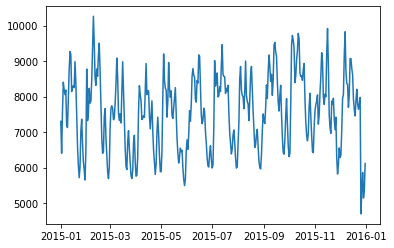

In [14]:
plt.plot(SES_foods_predict)

И сравниваем с графиком фактических данных

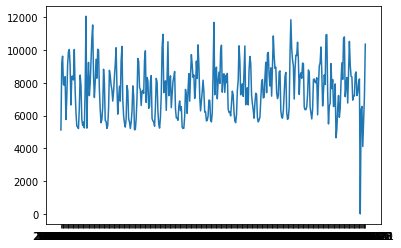

In [21]:
plt.plot(foods_date)

Проверяем значение ошибки МАЕ для тренировочной выборки

In [32]:
mean_absolute_error(SES_foods_predict, foods_date)

1167.800421364479

Простое экспоненциальное сглаживание на тестовой выборке для категории foods

In [15]:
SES_foods_test = SimpleExpSmoothing(foods_date_test)
SES_foods_test_fit = SES_foods_test.fit()

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [16]:
SES_foods_test_predict = SES_foods_test_fit.predict(0, len(foods_date_test)-1)
SES_foods_test_predict

2016-01-01     7011.0
2016-01-02     7011.0
2016-01-03    10509.0
2016-01-04     9955.0
2016-01-05     7134.0
               ...   
2016-04-20     7794.0
2016-04-21     7527.0
2016-04-22     7671.0
2016-04-23     8874.0
2016-04-24    10233.0
Freq: D, Length: 115, dtype: float64

Проверяем значение ошибки МАЕ для тестовой выборки

In [33]:
mean_absolute_error(foods_date_test, SES_foods_test_predict)

1393.0260869565218

Рисуем график прогнозов для тестовой выборки

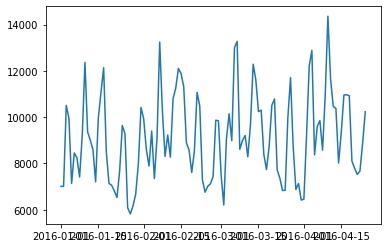

In [34]:
plt.plot(SES_foods_test_predict)

И сравниваем с графиком тестовых данных

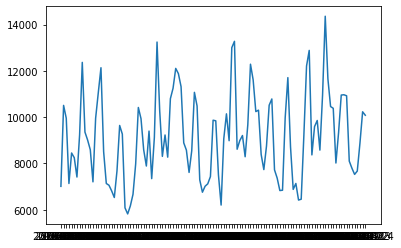

In [35]:
plt.plot(foods_date_test)

### Простое экспоненциальное сглаживание для категории hobbies

Модель

In [17]:
SES_hobbies = SimpleExpSmoothing(hobbies_date)
SES_hobbies_fit = SES_hobbies.fit()

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Прогноз

In [18]:
SES_hobbies_predict = SES_hobbies_fit.predict(0, 364)
SES_hobbies_predict

2015-01-01    841.395251
2015-01-02    838.070502
2015-01-03    845.103939
2015-01-04    846.531791
2015-01-05    844.824917
                 ...    
2015-12-27    942.747671
2015-12-28    941.246391
2015-12-29    932.319532
2015-12-30    928.748389
2015-12-31    929.344184
Freq: D, Length: 365, dtype: float64

Графики

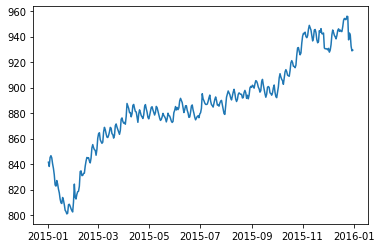

In [71]:
plt.plot(SES_hobbies_predict)

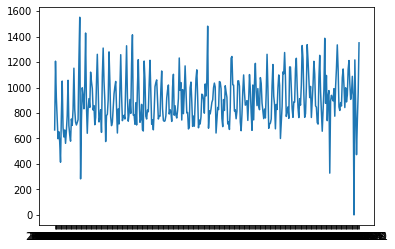

In [70]:
plt.plot(hobbies_date)

МАЕ

In [35]:
mean_absolute_error(hobbies_date, SES_hobbies_predict)

148.6433042675224

In [ ]:
Простое экспоненциальное сглаживание для категории hobbies на тестовой выборке

In [22]:
SES_hobbies_test = SimpleExpSmoothing(hobbies_date_test)
SES_hobbies_test_fit = SES_hobbies_test.fit()

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [23]:
SES_hobbies_test_predict = SES_hobbies_test_fit.predict(0, len(hobbies_date_test)-1)
SES_hobbies_test_predict

2016-01-01    939.22639
2016-01-02    939.22639
2016-01-03    939.22639
2016-01-04    939.22639
2016-01-05    939.22639
                ...    
2016-04-20    939.22639
2016-04-21    939.22639
2016-04-22    939.22639
2016-04-23    939.22639
2016-04-24    939.22639
Freq: D, Length: 115, dtype: float64

In [37]:
mean_absolute_error(hobbies_date_test, SES_hobbies_test_predict)

174.77735526271894

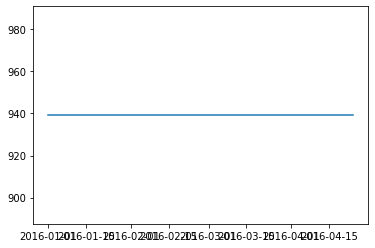

In [36]:
plt.plot(SES_hobbies_test_predict)

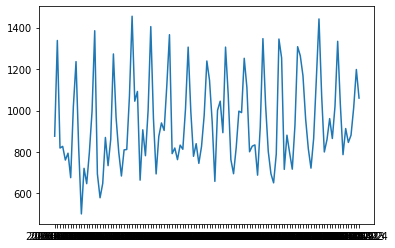

In [101]:
plt.plot(hobbies_date_test)

## Экспоненциальное сглаживание

In [26]:
ES_foods = ExponentialSmoothing(foods_date)
ES_foods_fit = ES_foods.fit()

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [28]:
ES_foods_predict = ES_foods_fit.predict(0, 364)
ES_foods_predict

2015-01-01    7303.778072
2015-01-02    6406.857439
2015-01-03    7553.989072
2015-01-04    8405.352875
2015-01-05    8202.444391
                 ...     
2015-12-27    5379.199649
2015-12-28    5864.022186
2015-12-29    5144.264854
2015-12-30    5345.685421
2015-12-31    6115.328458
Freq: D, Length: 365, dtype: float64

In [38]:
mean_absolute_error(foods_date, ES_foods_predict)

1167.800421364479

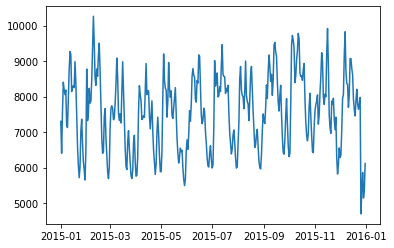

In [39]:
plt.plot(ES_foods_predict)

In [44]:
ES_foods_test = ExponentialSmoothing(foods_date_test)
ES_foods_test_fit = ES_foods_test.fit()

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [45]:
ES_foods_test_predict = ES_foods_test_fit.predict(0, len(foods_date_test)-1)
ES_foods_test_predict

2016-01-01     7011.0
2016-01-02     7011.0
2016-01-03    10509.0
2016-01-04     9955.0
2016-01-05     7134.0
               ...   
2016-04-20     7794.0
2016-04-21     7527.0
2016-04-22     7671.0
2016-04-23     8874.0
2016-04-24    10233.0
Freq: D, Length: 115, dtype: float64

In [46]:
mean_absolute_error(foods_date_test, ES_foods_test_predict)

1393.0260869565218

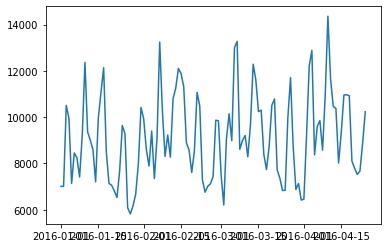

In [47]:
plt.plot(ES_foods_test_predict)

### Экспоненциальное сглаживание для категории hobbies

In [48]:
ES_hobbies = ExponentialSmoothing(hobbies_date)
ES_hobbies_fit = ES_hobbies.fit()

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [49]:
ES_hobbies_predict = ES_hobbies_fit.predict(0, 364)
ES_hobbies_predict

2015-01-01    841.395251
2015-01-02    838.070502
2015-01-03    845.103939
2015-01-04    846.531791
2015-01-05    844.824917
                 ...    
2015-12-27    942.747671
2015-12-28    941.246391
2015-12-29    932.319532
2015-12-30    928.748389
2015-12-31    929.344184
Freq: D, Length: 365, dtype: float64

In [56]:
mean_absolute_error(hobbies_date, ES_hobbies_predict)

148.6433042675224

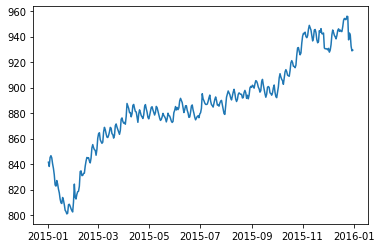

In [50]:
plt.plot(ES_hobbies_predict)

In [51]:
ES_hobbies_test = ExponentialSmoothing(hobbies_date_test)
ES_hobbies_test_fit = ES_hobbies_test.fit()

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [52]:
ES_hobbies_test_predict = ES_hobbies_test_fit.predict(0, len(hobbies_date_test)-1)
ES_hobbies_test_predict

2016-01-01    939.22639
2016-01-02    939.22639
2016-01-03    939.22639
2016-01-04    939.22639
2016-01-05    939.22639
                ...    
2016-04-20    939.22639
2016-04-21    939.22639
2016-04-22    939.22639
2016-04-23    939.22639
2016-04-24    939.22639
Freq: D, Length: 115, dtype: float64

In [57]:
mean_absolute_error(hobbies_date_test, ES_hobbies_test_predict)

174.77735526271894

### Экспоненциальное сглаживание для категории household

In [53]:
ES_household = ExponentialSmoothing(household_date)
ES_household_fit = ES_household.fit()

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [54]:
ES_household_predict = ES_household_fit.predict(0, 364)
ES_household_predict

2015-01-01    2163.484342
2015-01-02    2151.339327
2015-01-03    2184.239558
2015-01-04    2192.785220
2015-01-05    2175.685063
                 ...     
2015-12-27    2330.494908
2015-12-28    2332.950916
2015-12-29    2294.060104
2015-12-30    2282.931647
2015-12-31    2287.879019
Freq: D, Length: 365, dtype: float64

In [55]:
mean_absolute_error(household_date, ES_household_predict)

432.66898680682186

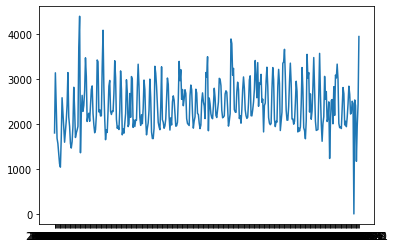

In [111]:
plt.plot(household_date)

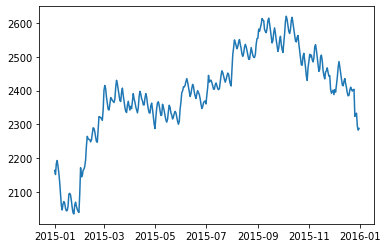

In [112]:
plt.plot(ES_household_predict)

In [113]:
ES_household_test = ExponentialSmoothing(household_date_test)
ES_household_test_fit = ES_household_test.fit()

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [114]:
ES_household_test_predict = ES_household_test_fit.predict(0, len(household_date_test)-1)
ES_household_test_predict

2016-01-01    2555.0
2016-01-02    2555.0
2016-01-03    3428.0
2016-01-04    2861.0
2016-01-05    2421.0
               ...  
2016-04-20    2157.0
2016-04-21    2222.0
2016-04-22    2391.0
2016-04-23    2919.0
2016-04-24    3431.0
Freq: D, Length: 115, dtype: float64

In [116]:
mean_absolute_error(household_date_test, ES_household_test_predict)

444.81739130434784

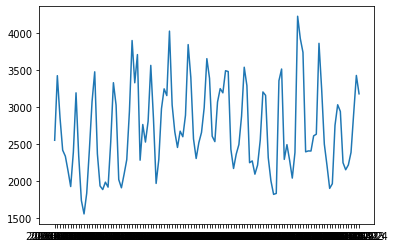

In [117]:
plt.plot(household_date_test)

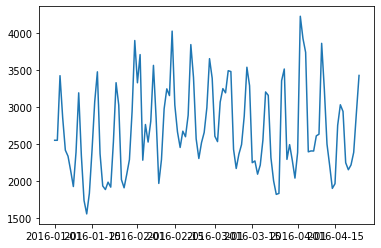

In [119]:
plt.plot(ES_household_test_predict)